In [1]:
import os
from pathlib import Path
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx

In [2]:
# loading python packages and files from repo root
if Path(os.getcwd()).name != "SSL4EO_base":
    os.chdir("..")
from data import constants
from data.constants import MMEARTH_DIR, input_size
from data import MMEarthDataset, create_MMEearth_args

/home/stefan/.conda/envs/SSL4eo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# initialize dataset
modalities = { # only want positional information this time
    "lat": constants.MODALITIES_FULL["lat"], "lon": constants.MODALITIES_FULL["lon"]
}
split = "train"
args = create_MMEearth_args(MMEARTH_DIR, modalities, None)

dataset = MMEarthDataset(args, split=split)

In [73]:
def get_location(idx):
    # lat lon are encoded with sin cos, so we need to reverse that encoding
    sin_lat, cos_lat = dataset[idx]["lat"]
    sin_lon, cos_lon = dataset[idx]["lon"]
    
    latitude = np.degrees(np.arctan2(sin_lat, cos_lat))
    longitude = np.degrees(np.arctan2(sin_lon, cos_lon))
    
    # return point object
    return Point(longitude, latitude)

In [74]:
# lets get the first few point locations
num_samples = len(dataset)
geometries = [get_location(idx) for idx in range(num_samples)]

In [75]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=geometries, crs="WGS84") # global crs

In [78]:
gdf.to_file("test.gpkg")

In [76]:
# project to Web Mercator to add basemap
gdf_ = gdf.to_crs(epsg=3857)

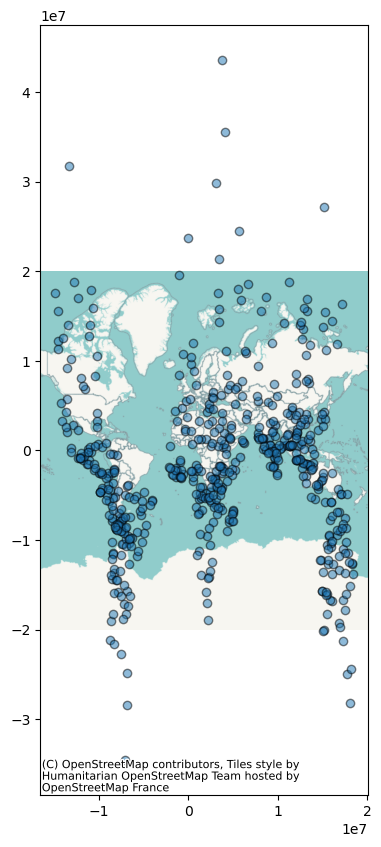

In [77]:
# plot and add basemap
ax = gdf_.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)